In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.config.set_visible_devices([], 'GPU')

In [2]:
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3 

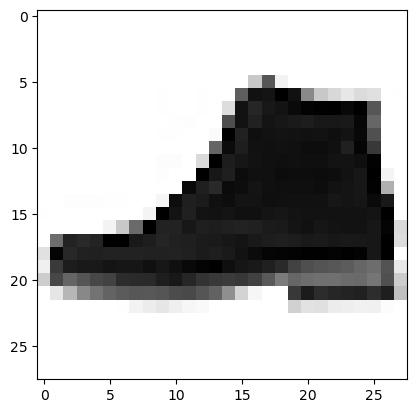

In [4]:
index = 42

np.set_printoptions(linewidth=320)

print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

plt.imshow(training_images[index], cmap='Greys')

In [5]:
# normalize 0-255 values 
training_images = training_images / 255.0
test_images = test_images / 255.0

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5


2023-03-03 17:12:58.817290: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


   1/1875 [..............................] - ETA: 11:40 - loss: 2.4529 - accuracy: 0.1562

2023-03-03 17:12:59.058653: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x29c83e3a0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-03-03 17:12:59.058668: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2023-03-03 17:12:59.077436: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-03 17:12:59.222797: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 2s 809us/step - loss: 0.4910 - accuracy: 0.8272
Epoch 2/5
1875/1875 [==============================] - 2s 820us/step - loss: 0.3717 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 2s 887us/step - loss: 0.3336 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 2s 803us/step - loss: 0.3089 - accuracy: 0.8863
Epoch 5/5
1875/1875 [==============================] - 1s 791us/step - loss: 0.2946 - accuracy: 0.8915


In [9]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 465us/step - loss: 0.3536 - accuracy: 0.8715


[0.35364919900894165, 0.8715000152587891]